### Stock Prediction :
#### Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [26]:
df = pd.read_csv('Datasets/TSLA.csv')

In [27]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
1,2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
2,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700
3,2022-10-06,239.440002,244.580002,235.350006,238.130005,238.130005,69298400
4,2022-10-07,233.940002,234.570007,222.020004,223.070007,223.070007,83916800
5,2022-10-10,223.929993,226.990005,218.360001,222.960007,222.960007,67925000
6,2022-10-11,220.949997,225.750000,215.000000,216.500000,216.500000,77013200
7,2022-10-12,215.330002,219.300003,211.509995,217.240005,217.240005,66860700
8,2022-10-13,208.300003,222.990005,206.220001,221.720001,221.720001,91483000
9,2022-10-14,224.009995,226.259995,204.160004,204.990005,204.990005,94124500


In [28]:
data = df['Close'].values.reshape(-1, 1)

In [29]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [30]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [31]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [32]:
sequence_length = 10 
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [33]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
6/6 [==============================] - 2s 5ms/step - loss: 0.2375
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 0.1840
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 0.1337
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0900
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0518
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0092
Epoch 11/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 12/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 13/50
6/6 [==============================] - 0s 7ms/step - loss: 0.

In [35]:
# Predict stock prices on the test data
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual stock prices
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

2/2 [==============================] - 0s 3ms/step


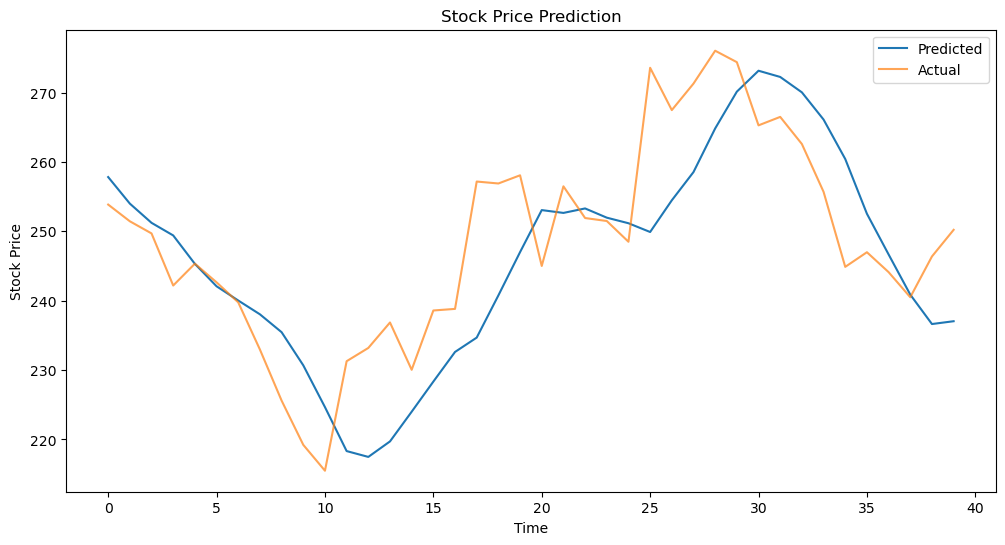

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.show()